11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.8600 - loss: 0.4504 - val_accuracy: 0.9877 - val_loss: 0.0501
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.9821 - loss: 0.0555 - val_accuracy: 0.9872 - val_loss: 0.0457
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9888 - loss: 0.0369 - val_accuracy: 0.9905 - val_loss: 0.0328
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9907 - val_loss: 0.0363
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9905 - val_loss: 0.0377
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9887 - loss: 0.0332
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


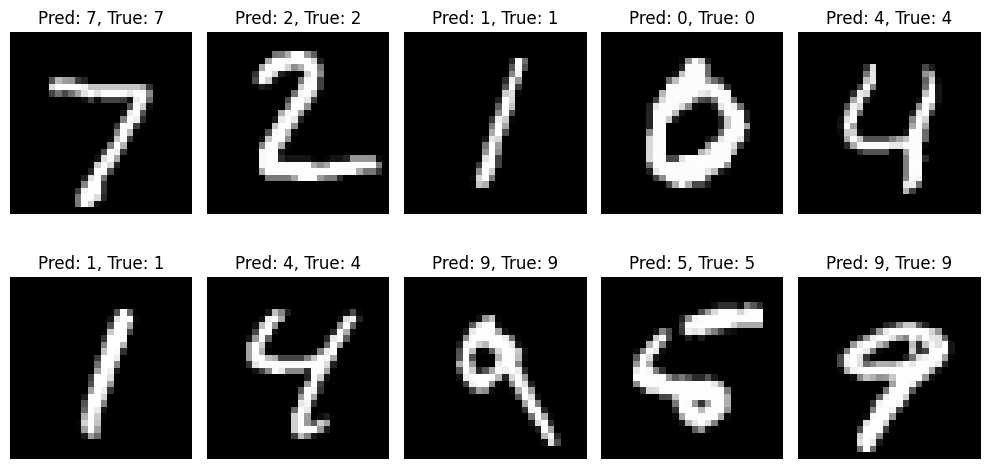

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


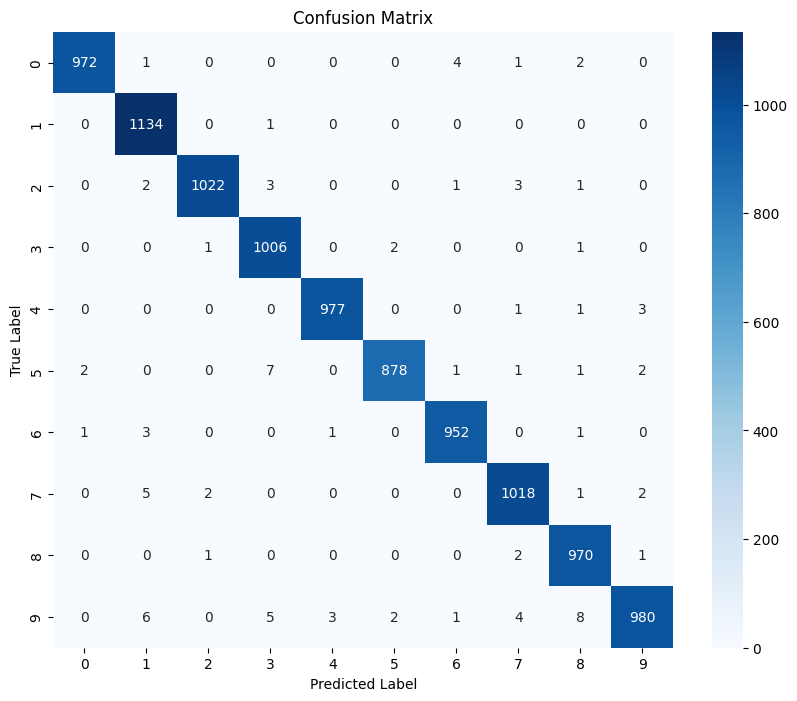

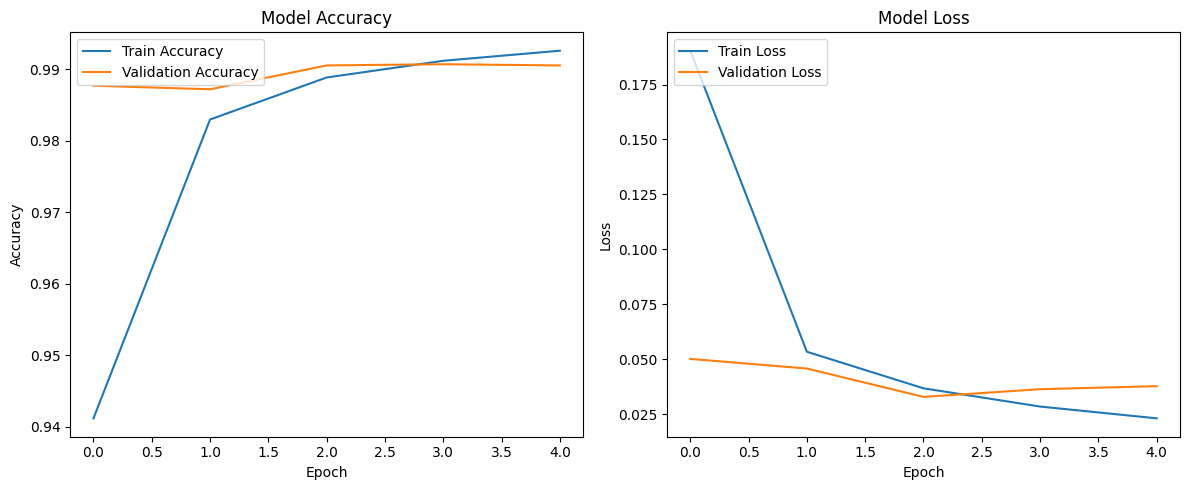

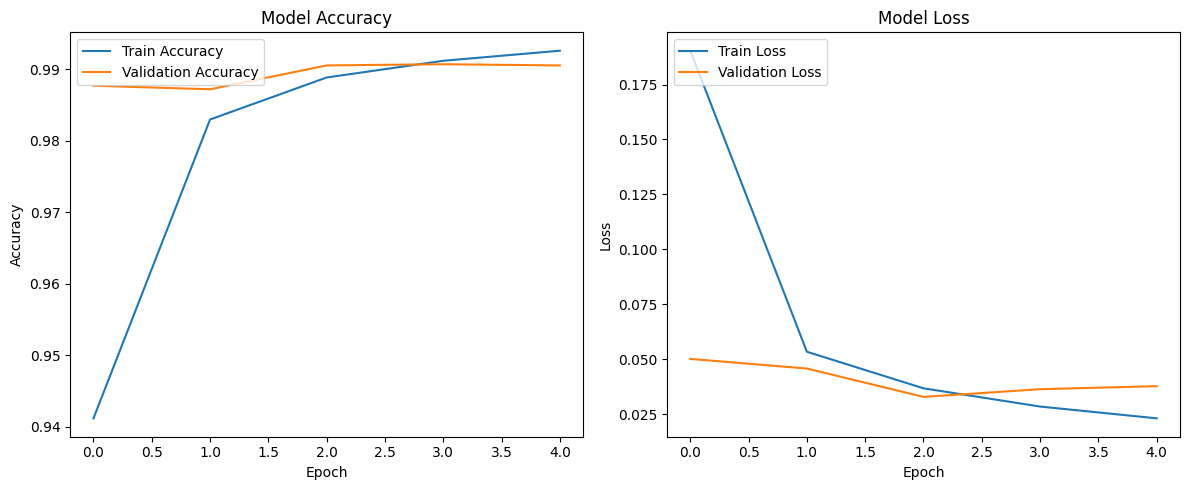

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.metrics import confusion_matrix
import seaborn as sns

class MNISTClassifierApp:
    def __init__(self, root):
        self.root = root
        self.root.title("MNIST Digit Classifier")
        
        # Create buttons for loading data, training model, and visualizing results
        self.load_button = ttk.Button(root, text="Load MNIST Data", command=self.load_data)
        self.load_button.pack(pady=10)
        
        self.train_button = ttk.Button(root, text="Train Model", command=self.train_model)
        self.train_button.pack(pady=10)
        self.train_button.config(state=tk.DISABLED)
        
        self.predict_button = ttk.Button(root, text="Visualize Predictions", command=self.visualize_predictions)
        self.predict_button.pack(pady=10)
        self.predict_button.config(state=tk.DISABLED)

        self.confusion_button = ttk.Button(root, text="Show Confusion Matrix", command=self.show_confusion_matrix)
        self.confusion_button.pack(pady=10)
        self.confusion_button.config(state=tk.DISABLED)

        self.history_button = ttk.Button(root, text="Show Training History", command=self.show_training_history)
        self.history_button.pack(pady=10)
        self.history_button.config(state=tk.DISABLED)

        self.status_label = ttk.Label(root, text="")
        self.status_label.pack(pady=10)

        # Initialize model variable and history variable
        self.model = None
        self.history = None

    def load_data(self):
        # Load the MNIST dataset
        (self.train_images, self.train_labels), (self.test_images, self.test_labels) = mnist.load_data()
        
        # Preprocess data
        self.train_images = self.train_images.astype('float32') / 255.0
        self.test_images = self.test_images.astype('float32') / 255.0
        
        self.train_images = self.train_images.reshape((60000, 28, 28, 1))
        self.test_images = self.test_images.reshape((10000, 28, 28, 1))
        
        self.train_labels = to_categorical(self.train_labels)
        self.test_labels = to_categorical(self.test_labels)

        self.status_label.config(text="Data Loaded Successfully!")
        self.train_button.config(state=tk.NORMAL)

    def train_model(self):
        # Build the CNN model
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(64, activation='relu'))
        self.model.add(layers.Dense(10, activation='softmax'))

        # Compile the model
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

        # Train the model with validation split and store history
        self.history = self.model.fit(self.train_images, self.train_labels,
                                      epochs=5,
                                      batch_size=64,
                                      validation_split=0.1)

        # Evaluate the model on test data
        test_loss, test_acc = self.model.evaluate(self.test_images, self.test_labels)
        
        messagebox.showinfo("Training Complete", f"Test accuracy: {test_acc:.4f}")
        self.predict_button.config(state=tk.NORMAL)
        self.confusion_button.config(state=tk.NORMAL)
        self.history_button.config(state=tk.NORMAL)

    def visualize_predictions(self):
        if self.model is None:
            messagebox.showwarning("Model Not Trained", "Please train the model first.")
            return

        predictions = self.model.predict(self.test_images)
        predicted_classes = np.argmax(predictions, axis=1)

        plt.figure(figsize=(10, 10))
        for i in range(10):
            plt.subplot(4, 5, i + 1)
            plt.imshow(self.test_images[i].reshape(28, 28), cmap='gray')
            plt.title(f'Pred: {predicted_classes[i]}, True: {np.argmax(self.test_labels[i])}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    def show_confusion_matrix(self):
        if self.model is None:
            messagebox.showwarning("Model Not Trained", "Please train the model first.")
            return

        predictions = self.model.predict(self.test_images)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(self.test_labels, axis=1)

        cm = confusion_matrix(true_classes, predicted_classes)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

    def show_training_history(self):
        if self.history is None:
            messagebox.showwarning("No Training History", "Please train the model first.")
            return

        plt.figure(figsize=(12, 5))

        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'], label='Train Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')

        plt.tight_layout()
        plt.show()

# # Run the Application
# if _name_ == "_main_":
#     root = tk.Tk()
#     app = MNISTClassifierApp(root)
#     root.mainloop()
# Run the Application
if __name__ == "__main__":
    root = tk.Tk()
    app = MNISTClassifierApp(root)
    root.mainloop()
